<h1><font size=12>
Deep Learning y Redes Neuronales</h1>
<h1>E08 - Sentiment Prediction<br></h1>

Developed by [Jesus Solano](http://www.jesussolanogomez.com/) <br> 
Version 8.3, 11 Julio 2018 


# Exercise 08

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('../datasets/Tweets.zip', 'r') as z:
    f = z.open('Tweets.csv')
    tweets = pd.read_csv(f, index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [3]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [4]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

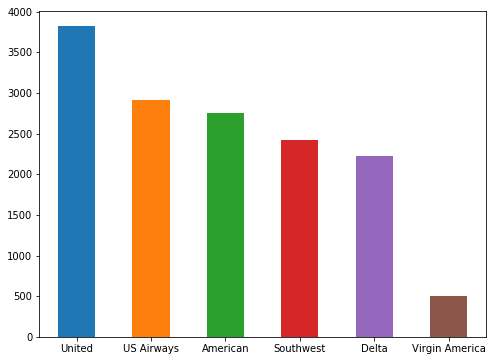

In [5]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

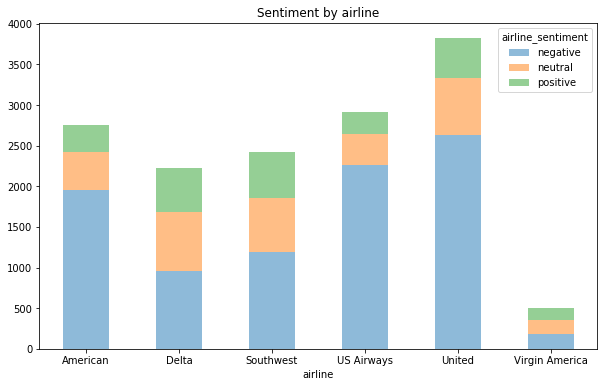

In [6]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 8.1 

Predict the sentiment using CountVectorizer, stopwords, n_grams, stemmer, TfidfVectorizer

use Random Forest classifier

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [8]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [9]:
# use CountVectorizer to create document-term matrices from X
vectorizer = CountVectorizer()
xVect = vectorizer.fit_transform(X)

In [10]:
# Define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vect,X):
    X_dtm = vect.fit_transform(X)
    print('Features: ', X_dtm.shape[1])
    algorithm = RandomForestClassifier()
    print('Cross Validation description: \n ')
    print(pd.Series(cross_val_score(algorithm, X_dtm, y, cv=10)).describe())

In [11]:
# Only Countvectorizer. 
vectorizer = CountVectorizer()
tokenize_test(vectorizer,X)

Features:  15051
Cross Validation description: 
 
count    10.000000
mean      0.712699
std       0.023682
min       0.668033
25%       0.699004
50%       0.719945
75%       0.720771
max       0.756148
dtype: float64


In [12]:
# Ngrams Countvectorizer. 
vectorizerNgram = CountVectorizer(ngram_range=(1,3))
tokenize_test(vectorizerNgram,X)

Features:  293223
Cross Validation description: 
 
count    10.000000
mean      0.710654
std       0.018648
min       0.683060
25%       0.704666
50%       0.707167
75%       0.715505
max       0.746585
dtype: float64


In [13]:
# Removing stopwords- English.
vectorizerStopWords = CountVectorizer(stop_words='english')
tokenize_test(vectorizerStopWords,X)

Features:  14770
Cross Validation description: 
 
count    10.000000
mean      0.691869
std       0.042294
min       0.617486
25%       0.662227
50%       0.700341
75%       0.715066
max       0.765027
dtype: float64


In [14]:
# Define a function that accepts text and returns a list of lemmas
def split_into_stemmes(text):
    # Initialize stemmer
    stemmer = SnowballStemmer('english')
    text = text.lower()
    words = text.split()
    return [stemmer.stem(word) for word in words]


In [15]:
# Using stemming.
vectorizerStemming = CountVectorizer(analyzer=split_into_stemmes)
tokenize_test(vectorizerStemming,X)

Features:  24229
Cross Validation description: 
 
count    10.000000
mean      0.702864
std       0.028582
min       0.640710
25%       0.689103
50%       0.704096
75%       0.727086
max       0.733607
dtype: float64


In [16]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

import nltk
nltk.download('wordnet')

# Define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]




[nltk_data] Downloading package wordnet to /home/jesus/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
# Using lemmas.
vectorizerLemmas = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vectorizerStemming,X)

Features:  24229
Cross Validation description: 
 
count    10.000000
mean      0.704642
std       0.019420
min       0.672131
25%       0.699024
50%       0.705119
75%       0.716530
max       0.737705
dtype: float64


# Exercise 8.2

Train a Deep Neural Network with the following architecture:

- Input = text 
- Dense(128)
- Relu Activation
- BatchNormalization
- Dropout(0.5)
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 55% with 50 epochs)

In [18]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import RMSprop
from keras.callbacks import History
from livelossplot import PlotLossesKeras

Using TensorFlow backend.


In [19]:
# use CountVectorizer to create document-term matrices from X
vectorizer = CountVectorizer()
xVect = vectorizer.fit_transform(X)
dimensionality = xVect.shape[1]

# Restart session in keras.
from keras import backend as K
K.clear_session()

outputClasses=3

nn=Sequential()

nn.add(Dense(128, input_shape=(dimensionality,)))
nn.add(Activation('relu'))
nn.add(BatchNormalization())
nn.add(Dropout(0.5))
nn.add(Dense(outputClasses))
nn.add(Activation('softmax'))

nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1926656   
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 1,927,555
Trainable params: 1,927,299
Non-trainable params: 256
________________________________________________________________

In [20]:
# Compile the model. 
nn.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

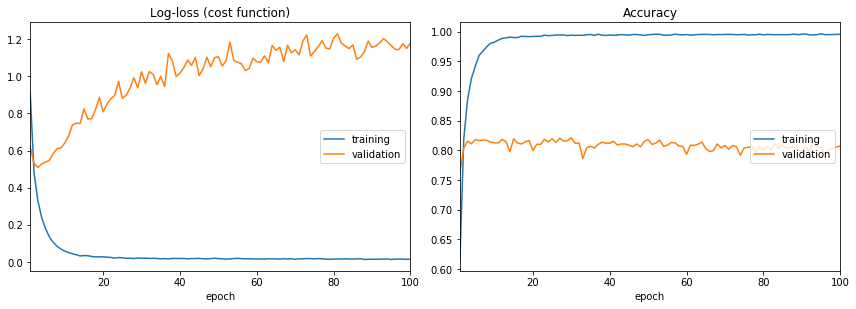

In [21]:
# Train neural network. 

yNew=np_utils.to_categorical(y,3)

nn.fit(xVect, yNew, epochs=100, verbose=2,batch_size=500,validation_split=0.2, callbacks=[PlotLossesKeras()])

In [23]:
# Calculating Accuracy.
print('Evaluating the test set...')
score = nn.evaluate(xVect, yNew)
print('\nTest score:', score[0])
print('Test accuracy:', score[1])

Evaluating the test set...
14640/14640 [==============================] - 8s 562us/step

Test score: 0.23938050005871014
Test accuracy: 0.9602459016393443
